# **Find Roi of an Image and perform operations**

A region of interest (ROI) is a portion of an image that you want to filter or operate on in some way.

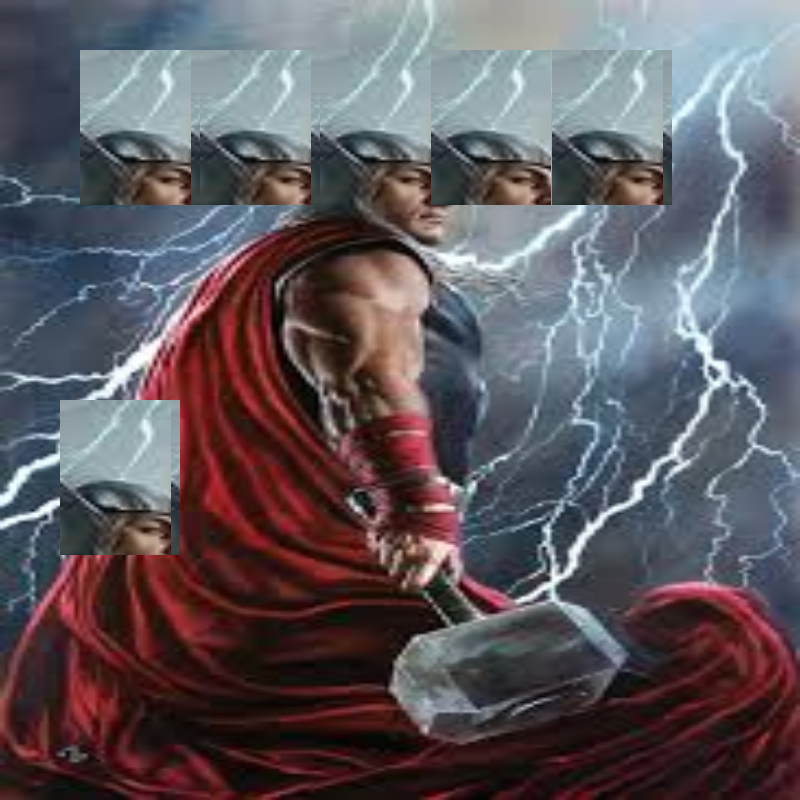

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use this for displaying images in Colab

# Read and resize image
img = cv2.imread("/content/Thor.jpeg")
if img is not None:
    img = cv2.resize(img, (800, 800))
else:
    print("Image not found. Check the path.")

# Extract the region of interest (ROI) - targeting a portion of the image
# Adjust the values based on your desired area; here, it's [y1:y2, x1:x2]
#note the different between y1 & y2 or x1 & x2 is 120.
roi = img[50:205, 320:440]

# Display the extracted ROI
#cv2_imshow(roi)

# Insert the ROI into multiple locations within the original image
# We replicate it across various positions by setting the pixel ranges
img[50:205, 431:551] = roi   # Right side of original ROI
img[50:205, 552:672] = roi   # Further right
img[50:205, 200:320] = roi   # Left side of original ROI
img[50:205, 80:200] = roi    # Further left

# Placing ROI at a different y position to create variety
img[400:555, 60:180] = roi

# Display the modified original image
cv2_imshow(img)

# Now, if you want to apply this ROI to another image, uncomment below and add an appropriate path.
# img1 = cv2.imread("/content/ironman.jpg")
# if img1 is not None:
#     img1 = cv2.resize(img1, (900, 600))
#     img1[1:156, 560:680] = roi
#     cv2_imshow(img1)
# else:
#     print("Second image not found. Check the path.")

# Release any resources if necessary
cv2.destroyAllWindows()


# **How to create a border for an image using opencv**

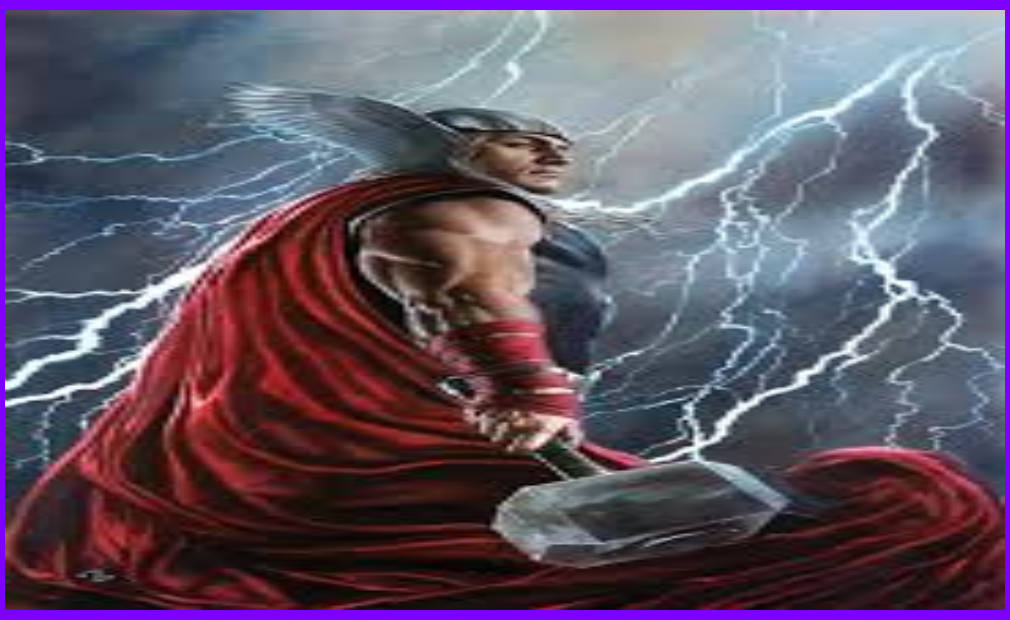

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the image
img1 = cv2.imread("/content/Thor.jpeg")

# Resize the image
img1 = cv2.resize(img1, (1000, 600))

# Create image border with specific color
# The order for border widths is (top, bottom, left, right)
brdr = cv2.copyMakeBorder(img1, 10, 10, 5, 5, cv2.BORDER_CONSTANT, value=[255, 0, 125])

# Display the image with the border
cv2_imshow(brdr)


# Image Blending with open cv

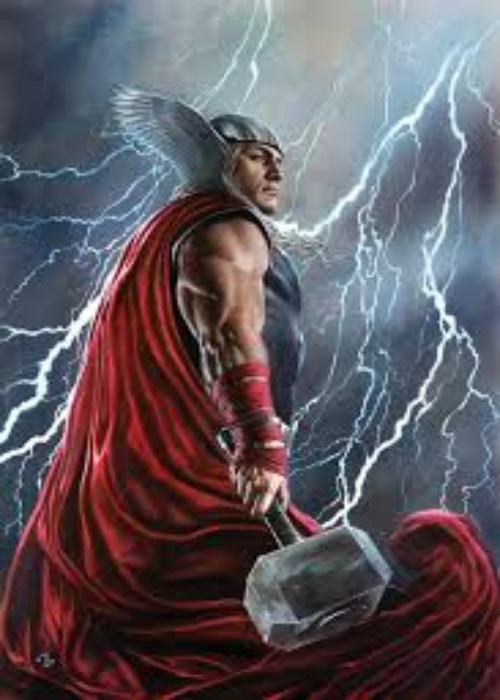

In [ ]:
#Image Blending with open cv
#Here We use two important functions cv2.add(), cv2.addWeighted() etc.
#Blending means addition of two images
#if you want to blend two images then both have same size
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Read two different images of the same channel
img1 = cv2.imread("/content/Thor.jpeg")
img1 = cv2.resize(img1, (500, 700))
img2 = cv2.imread("/content/Thor2.jpeg")
img2 = cv2.resize(img2, (500, 700))

# Display the original images
cv2_imshow(img1)
cv2_imshow(img2)

# Perform blending using different methods
# Uncomment these lines if you want to try them

# result = img2 + img1  # NumPy addition (module-based addition)
# result1 = cv2.add(img1, img2)  # Saturated addition (value by value)

# Weighted addition with weights that sum up to 1
result2 = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

# Display results
# cv2_imshow(result)  # NumPy addition result
# cv2_imshow(result1)  # cv2.add() result
cv2_imshow(result2)  # cv2.addWeighted() result


# **Project on Image Blending**

In [5]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Read and resize two images
img1 = cv.imread("/content/Thor.jpeg")
img1 = cv.resize(img1, (500, 700))
img2 = cv.imread("/content/Thor2.jpeg")
img2 = cv.resize(img2, (500, 700))

# Function to simulate blending based on user input for alpha and switch
def manual_blending(img1, img2):
    while True:
        # Input alpha value between 0 to 100 and switch state
        try:
            alpha = float(input("Enter alpha (0 to 100, or -1 to quit): "))
            if alpha == -1:
                print("Exiting blending.")
                break
            if not 0 <= alpha <= 100:
                print("Please enter a valid alpha between 0 and 100.")
                continue

            switch = int(input("Enter switch (0 for OFF, 1 for ON): "))
            if switch not in [0, 1]:
                print("Please enter 0 or 1 for switch.")
                continue

        except ValueError:
            print("Invalid input. Please enter numeric values.")
            continue

        # Normalize alpha value
        na = alpha / 100.0

        # Blend images based on switch status
        if switch == 0:
            dst = np.zeros_like(img1)  # Display a blank image when OFF
        else:
            dst = cv.addWeighted(img1, 1 - na, img2, na, 0)
            cv.putText(dst, f'Alpha: {int(alpha)}', (20, 50), cv.FONT_HERSHEY_SIMPLEX,
                       1, (0, 125, 255), 2)

        # Display the result
        cv2_imshow(dst)

# Run the manual blending function
manual_blending(img1, img2)


Enter alpha (0 to 100, or -1 to quit): -1
Exiting blending.
